# **<font color=blue> PROYECTO FINAL**
## <font color=blue> MLP - MULTI LAYER PERCEPTRON

In [18]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split as TTS
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
SM_filepath = './MLP'
ds_MalwareO = pd.read_csv("./dynamic_api_call_sequence_per_malware_100_0_306.csv")
ds_MalwareO.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [3]:
#ELIMINACION DE FEATURES QUE NO APORTAN INFORMACION 
ds_Malware = ds_MalwareO.drop(columns=["hash"],axis=1)
ds_Malware.shape

(43876, 101)

In [4]:
Y= ds_Malware["malware"]
X = ds_Malware.drop(columns=["malware"])
X_Train, X_Test, Y_Train, Y_Test = TTS(X,Y,test_size=0.2,random_state=9)

**UTILIZANDO KERAS**

In [5]:
model = Sequential()
model.add(Dense(128, input_shape=(100,), activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.5)),
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))

In [24]:
Model_Optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) 
model.compile(optimizer=Model_Optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) 
Model_EarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)
Model_checkpoint= tf.keras.callbacks.ModelCheckpoint(filepath=SM_filepath,save_weights_only=False, monitor='val_accuracy',mode='max', save_best_only=True)

In [26]:
Model_Fit = model.fit(X_Train.values, Y_Train.values, epochs = 10, batch_size=1000, validation_split = 0.15, verbose = 0, callbacks = [Model_EarlyStop,Model_checkpoint])
Model_Fit_History = Model_Fit.history
save_model(model, SM_filepath)

INFO:tensorflow:Assets written to: ./MLP\assets


Text(0.5, 0, 'Epochs')

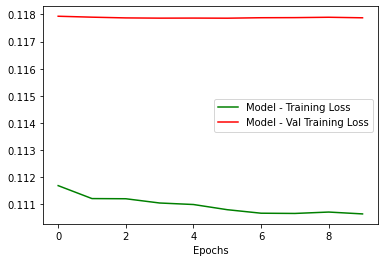

In [27]:
Loss = Model_Fit_History['loss']
Val_Loss = Model_Fit_History['val_loss']
plt.plot(Loss,'g',label='Model - Training Loss')
plt.plot(Val_Loss,'r',label='Model - Val Training Loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

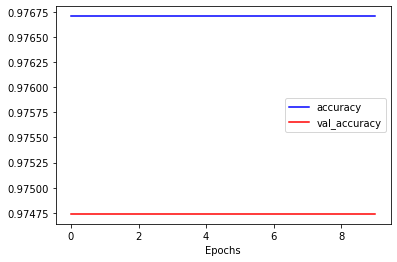

In [28]:
Accuracy = Model_Fit_History['accuracy']
Val_Accuracy = Model_Fit_History['val_accuracy']
plt.plot(Accuracy,'-b',label='accuracy')
plt.plot(Val_Accuracy,'-r',label='val_accuracy')
plt.legend()
plt.xlabel("Epochs")

In [29]:
Pred_K_P = model.predict(X_Test)
Accuracy_K =metrics.average_precision_score(Y_Test, Pred_K_P)
MLP_K = pd.DataFrame({
    'MLP': ['MLP Keras'],
    'Acurracy': [Accuracy_K]
})
MLP_K

,MLP,Acurracy
0,MLP Keras,0.971399


**UTILIZANDO SKLEARN**

In [11]:
MLP = MLPC(solver='adam',hidden_layer_sizes=(100,100,100),max_iter=800,random_state=50)
MLP.fit(X_Train, Y_Train)
Pred = MLP.predict(X_Test)
Pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
F1 = metrics.f1_score(Y_Test, Pred)
Accuracy =metrics.accuracy_score(Y_Test, Pred)
Precission = metrics.precision_score(Y_Test, Pred)
Recall = metrics.recall_score(Y_Test, Pred)
MLP_S = pd.DataFrame({
    'MLP': ['MLP Sklearn'],
    'F1': [F1],
    'Acurracy': [Accuracy],
    'Precission': [Precission],
    'Recall': [Recall]
})
MLP_S

,MLP,F1,Acurracy,Precission,Recall
0,MLP Sklearn,0.991214,0.982794,0.983376,0.999179


Average precision-recall score: 0.98


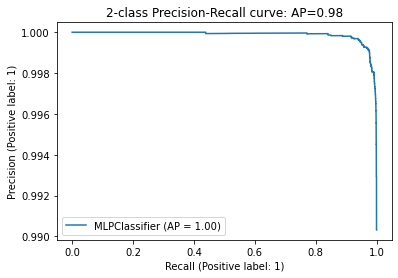

In [13]:
average_precision = average_precision_score(Y_Test, Pred)
disp = plot_precision_recall_curve(MLP,X_Train, Y_Train)
disp.ax_.set_title('2-class Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

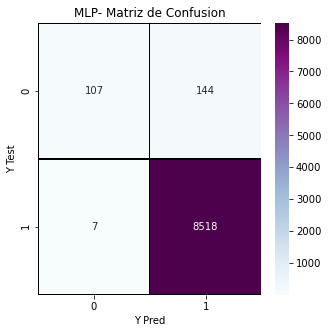

In [22]:
ConM = confusion_matrix(Y_Test, Pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(ConM, annot=True, linewidth=0.4, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP- Matriz de Confusion')
plt.xlabel('Y Pred')
plt.ylabel('Y Test')
plt.show()